In [5]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
plt.style.use('classic')

In [6]:
df = pd.read_csv('data/hindustan_unilever/hindustan_unilever.csv')
hu = pdr.DataReader('HINDUNILVR.BO', data_source='yahoo', start='2015-10-23', end='2019-12-30')

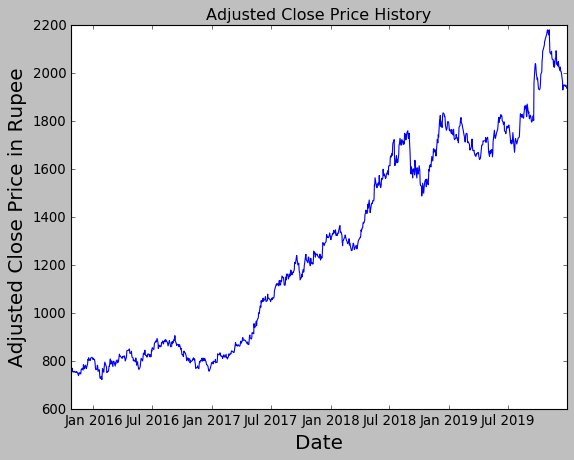

<Figure size 1600x800 with 0 Axes>

In [7]:
# visualize the adj. closing price history
plt.title('Adjusted Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price in Rupee', fontsize=18)
plt.plot(hu['Adj Close'])
plt.figure(figsize=(20,10))
plt.show()

In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-23,792.0,805.349976,792.000000,800.049988,753.185669,124474.0
1,2015-10-26,800.0,808.799988,800.000000,807.049988,759.775574,47932.0
2,2015-10-27,807.0,813.250000,799.500000,811.400024,763.870911,49230.0
3,2015-10-28,812.0,818.700012,807.900024,817.400024,769.519409,50728.0
4,2015-10-29,815.0,817.500000,799.150024,801.549988,754.597778,63678.0


In [9]:
print('\n Shape of the data:')
print(df.shape)



 Shape of the data:
(1028, 7)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 7 columns):
Date         1028 non-null object
Open         1027 non-null float64
High         1027 non-null float64
Low          1027 non-null float64
Close        1027 non-null float64
Adj Close    1027 non-null float64
Volume       1027 non-null float64
dtypes: float64(6), object(1)
memory usage: 56.3+ KB


In [11]:
df.isna().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 1027
Data columns (total 7 columns):
Date         1027 non-null object
Open         1027 non-null float64
High         1027 non-null float64
Low          1027 non-null float64
Close        1027 non-null float64
Adj Close    1027 non-null float64
Volume       1027 non-null float64
dtypes: float64(6), object(1)
memory usage: 64.2+ KB


In [14]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


In [15]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Adj Close'])


In [16]:

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Adj Close'][i] = data['Adj Close'][i]


In [17]:
train = new_data[:924]
valid = new_data[924:]

In [18]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of training set:
(924, 2)

 Shape of validation set:
(103, 2)


In [19]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Adj Close'][len(train)-103+i:].sum() + sum(preds)
    b = a/103
    preds.append(b)

In [20]:
# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Adj Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
252.56361520020099


/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/terminatorash2199/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


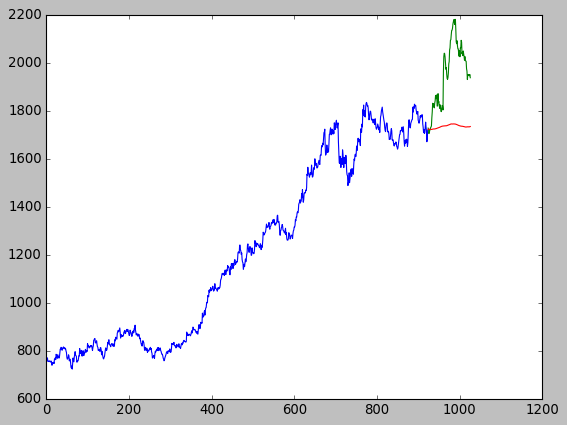

In [21]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])


In [22]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(valid['Adj Close'],preds))
# rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))


252.56361520020099